In [1]:
import time
import sys
sys.path.append('../')
from pinn_magnetic_experimental import MultiDipoleModel
import smtf_utility as util


TensorFlow version: 2.15.0


In [2]:
def percentage(input, predicted):
    adiff = abs(input-predicted)
    delta = 0
    if input > adiff:
        delta = input - adiff
    else:
        delta = adiff + input
    
    return ((delta/input) * 100)

In [3]:
sim = util.bf_simulator(distances=[1, 1.33, 1.66, 1.99], delta=30, scale=1e9)

xpole = 0.1
ypole = 0.2
zpole = -0.6

sim.add_dipole(0.0, 0, 0, xpole, 0, 0)
sim.add_dipole(0.0, 0, 0, 0, ypole, 0)
sim.add_dipole(0.0, 0, 0, 0, 0, zpole)

In [4]:
positions, values = sim.get_data()
positions, values = util.shuffle_data(positions, values)

In [5]:
model = MultiDipoleModel(poles=1, lrate=0.001, optimizer='nadam', loss='mse', scale=1e9, early_stop=False, target_stop=.000000002)
test_epochs = 500

In [6]:
start = time.time()
model.fit(positions, values, epochs=test_epochs)
end = time.time()

epoch  0 --- Loss --- 436.19397
epoch  1 --- Loss --- 372.35638
epoch  2 --- Loss --- 321.95505
epoch  3 --- Loss --- 279.40656
epoch  4 --- Loss --- 243.11658
epoch  5 --- Loss --- 211.98167
epoch  6 --- Loss --- 185.12045
epoch  7 --- Loss --- 161.80592
epoch  8 --- Loss --- 141.44179
epoch  9 --- Loss --- 123.5485
epoch  10 --- Loss --- 107.74855
epoch  11 --- Loss --- 93.7495
epoch  12 --- Loss --- 81.32514
epoch  13 --- Loss --- 70.29825
epoch  14 --- Loss --- 60.52554
epoch  15 --- Loss --- 51.886543
epoch  16 --- Loss --- 44.27584
epoch  17 --- Loss --- 37.59825
epoch  18 --- Loss --- 31.765873
epoch  19 --- Loss --- 26.696629
epoch  20 --- Loss --- 22.313557
epoch  21 --- Loss --- 18.544384
epoch  22 --- Loss --- 15.321576
epoch  23 --- Loss --- 12.582258
epoch  24 --- Loss --- 10.268171
epoch  25 --- Loss --- 8.325738
epoch  26 --- Loss --- 6.7059927
epoch  27 --- Loss --- 5.3645086
epoch  28 --- Loss --- 4.2612777
epoch  29 --- Loss --- 3.3605084
epoch  30 --- Loss --- 2.6305

In [7]:
ellapsed_minutes = ((end - start) / 60)
print("Total training time: " + str(ellapsed_minutes) + " minutes")

Total training time: 1.1435436407725017 minutes


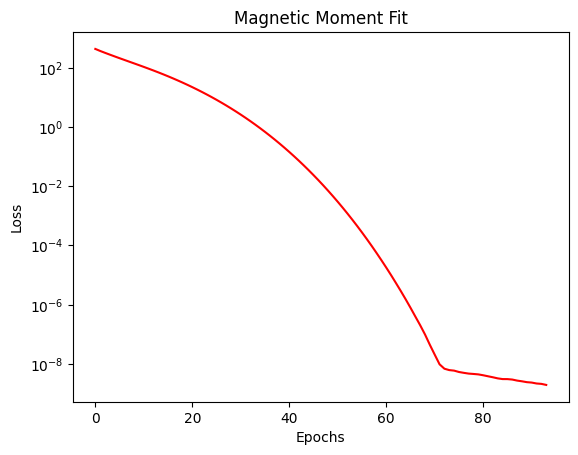

In [8]:
import matplotlib.pyplot as plt

y_axis = model.loss_history
x_axis = [*range(0, len(y_axis), 1)]

plt.plot(x_axis, y_axis, 'r-')
plt.yscale("log")
#plt.xscale("log")
plt.title('Magnetic Moment Fit')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

In [9]:
print("Predicted")
print(model.dipole())
print("Input")
print([[xpole, ypole, zpole]])

Predicted
[[ 0.10000001  0.19999996 -0.5999986 ]]
Input
[[0.1, 0.2, -0.6]]


In [10]:
est = model.dipole()

#x_acc = ((xpole - abs(xpole - est[-1][0]))/xpole) * 100.0
#y_acc = ((ypole - abs(ypole - est[-1][1]))/ypole) * 100.0
#z_acc = ((zpole - abs(zpole - est[-1][2]))/zpole) * 100.0
x_acc = percentage( xpole, est[-1][0])
y_acc = percentage(ypole, est[-1][1])
z_acc = percentage(zpole, est[-1][2])
print("Percentage Accuracy X-axis", x_acc)
print("Percentage Accuracy Y-axis", y_acc)
print("Percentage Accuracy Z-axis", z_acc)

print("********************************")
overall_acc = (x_acc + y_acc + z_acc)/3
print("Average Accuracy: ", overall_acc)



Percentage Accuracy X-axis 99.9999910593033
Percentage Accuracy Y-axis 99.99997913837433
Percentage Accuracy Z-axis 99.99976555506389
********************************
Average Accuracy:  99.9999119175805
